In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the csv file in DataFrame - mushroom_df
mushroom_df = pd.read_csv('mushrooms.csv')

In [3]:
# getting the feel of the data
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# checking some preliminary information about the data set so that we know if we need to change any data type in the following analysis
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# understanding the statistics of the data
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# checking for null values before we begin the analysis.
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# defining funtion to have right names instead of e and p to understand the data better.

def className(cols):
    
    if cols == 'e':
        return 'Edible'
    else:
        return 'Poisonous'

In [8]:
# creating a new column which will store the name of the class by calling the function above. This will also act as the target column
mushroom_df['class_name'] = mushroom_df['class'].apply(className)

In [9]:
# checking if the new column is added
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,Poisonous
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,Edible
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,Edible
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,Poisonous
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,Edible


In [10]:
# dropping the original column as it is now redundant and hence useless
mushroom_df.drop(['class'], axis = 1, inplace = True)

In [11]:
# checking if the new column is deleted
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,Poisonous
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,Edible
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,Edible
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,Poisonous
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,Edible


In [12]:
# defining funtion to have right names instead of b, c, x, etc. to understand the data better.

def capShapeName(cols):
    if cols == 'b':
        return 'Bell'
    elif cols == 'c':
        return 'Conical'
    elif cols == 'x':
        return 'Convex'
    elif cols == 'f':
        return 'Flat'
    elif cols == 'k':
        return 'Knobbed'
    elif cols == 's':
        return 'Sunken'
    else:
        return 'Unknown'

In [13]:
# creating a new column which will store the cap shape of the mushroom by calling the function above and checking if the new column is added

mushroom_df['cap_shape_name'] = mushroom_df['cap-shape'].apply(capShapeName)
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name
0,x,s,n,t,p,f,c,n,k,e,...,w,p,w,o,p,k,s,u,Poisonous,Convex
1,x,s,y,t,a,f,c,b,k,e,...,w,p,w,o,p,n,n,g,Edible,Convex
2,b,s,w,t,l,f,c,b,n,e,...,w,p,w,o,p,n,n,m,Edible,Bell
3,x,y,w,t,p,f,c,n,n,e,...,w,p,w,o,p,k,s,u,Poisonous,Convex
4,x,s,g,f,n,f,w,b,k,t,...,w,p,w,o,e,n,a,g,Edible,Convex


In [14]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted
mushroom_df.drop(['cap-shape'], axis = 1, inplace = True)
mushroom_df.head()

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name
0,s,n,t,p,f,c,n,k,e,e,...,w,p,w,o,p,k,s,u,Poisonous,Convex
1,s,y,t,a,f,c,b,k,e,c,...,w,p,w,o,p,n,n,g,Edible,Convex
2,s,w,t,l,f,c,b,n,e,c,...,w,p,w,o,p,n,n,m,Edible,Bell
3,y,w,t,p,f,c,n,n,e,e,...,w,p,w,o,p,k,s,u,Poisonous,Convex
4,s,g,f,n,f,w,b,k,t,e,...,w,p,w,o,e,n,a,g,Edible,Convex


In [15]:
# defining funtion to have right names instead of f, g, y, etc. to understand the data better.

def capSurfaceName(cols):
    if cols == 'f':
        return 'Fibrous'
    elif cols == 'g':
        return 'Grooves'
    elif cols == 'y':
        return 'Scaly'
    elif cols == 's':
        return 'Smooth'
    else:
        return 'Unknown'

In [16]:
# creating a new column which will store the cap surface of the mushroom by calling the function above and checking if the new column is added

mushroom_df['cap_surface_name'] = mushroom_df['cap-surface'].apply(capSurfaceName)
mushroom_df.head()

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name
0,s,n,t,p,f,c,n,k,e,e,...,p,w,o,p,k,s,u,Poisonous,Convex,Smooth
1,s,y,t,a,f,c,b,k,e,c,...,p,w,o,p,n,n,g,Edible,Convex,Smooth
2,s,w,t,l,f,c,b,n,e,c,...,p,w,o,p,n,n,m,Edible,Bell,Smooth
3,y,w,t,p,f,c,n,n,e,e,...,p,w,o,p,k,s,u,Poisonous,Convex,Scaly
4,s,g,f,n,f,w,b,k,t,e,...,p,w,o,e,n,a,g,Edible,Convex,Smooth


In [17]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted
mushroom_df.drop(['cap-surface'],axis = 1, inplace = True)
mushroom_df.head()

,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name
0,n,t,p,f,c,n,k,e,e,s,...,p,w,o,p,k,s,u,Poisonous,Convex,Smooth
1,y,t,a,f,c,b,k,e,c,s,...,p,w,o,p,n,n,g,Edible,Convex,Smooth
2,w,t,l,f,c,b,n,e,c,s,...,p,w,o,p,n,n,m,Edible,Bell,Smooth
3,w,t,p,f,c,n,n,e,e,s,...,p,w,o,p,k,s,u,Poisonous,Convex,Scaly
4,g,f,n,f,w,b,k,t,e,s,...,p,w,o,e,n,a,g,Edible,Convex,Smooth


In [18]:
# defining funtion to have right names instead of n, b, c, etc. to understand the data better.
def capColorName(cols):
    if cols == 'n':
        return 'Brown'
    elif cols == 'b':
        return 'Buff'
    elif cols == 'c':
        return 'Cinnamon'
    elif cols == 'g':
        return 'Gray'
    elif cols == 'r':
        return 'Green'
    elif cols == 'p':
        return 'Pink'
    elif cols == 'u':
        return 'Purple'
    elif cols == 'e':
        return 'Red'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 'Unknown'

In [19]:
# creating a new column which will store the cap color of the mushroom by calling the function above and checking if the new column is added

mushroom_df['cap_color_name'] = mushroom_df['cap-color'].apply(capColorName)
mushroom_df.head()

,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name
0,n,t,p,f,c,n,k,e,e,s,...,w,o,p,k,s,u,Poisonous,Convex,Smooth,Brown
1,y,t,a,f,c,b,k,e,c,s,...,w,o,p,n,n,g,Edible,Convex,Smooth,Yellow
2,w,t,l,f,c,b,n,e,c,s,...,w,o,p,n,n,m,Edible,Bell,Smooth,White
3,w,t,p,f,c,n,n,e,e,s,...,w,o,p,k,s,u,Poisonous,Convex,Scaly,White
4,g,f,n,f,w,b,k,t,e,s,...,w,o,e,n,a,g,Edible,Convex,Smooth,Gray


In [20]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted
mushroom_df.drop(['cap-color'],axis = 1, inplace = True)
mushroom_df.head()

,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name
0,t,p,f,c,n,k,e,e,s,s,...,w,o,p,k,s,u,Poisonous,Convex,Smooth,Brown
1,t,a,f,c,b,k,e,c,s,s,...,w,o,p,n,n,g,Edible,Convex,Smooth,Yellow
2,t,l,f,c,b,n,e,c,s,s,...,w,o,p,n,n,m,Edible,Bell,Smooth,White
3,t,p,f,c,n,n,e,e,s,s,...,w,o,p,k,s,u,Poisonous,Convex,Scaly,White
4,f,n,f,w,b,k,t,e,s,s,...,w,o,e,n,a,g,Edible,Convex,Smooth,Gray


In [21]:
# defining funtion to have right names instead of t and f to understand the data better.

def bruisesName(cols):
    if cols == 't':
        return True
    elif cols == 'f':
        return False
    else:
        return 0

In [22]:
# creating a new column which will store the bruise type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['bruises_name'] = mushroom_df['bruises'].apply(bruisesName)
mushroom_df.head()

,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name
0,t,p,f,c,n,k,e,e,s,s,...,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,True
1,t,a,f,c,b,k,e,c,s,s,...,o,p,n,n,g,Edible,Convex,Smooth,Yellow,True
2,t,l,f,c,b,n,e,c,s,s,...,o,p,n,n,m,Edible,Bell,Smooth,White,True
3,t,p,f,c,n,n,e,e,s,s,...,o,p,k,s,u,Poisonous,Convex,Scaly,White,True
4,f,n,f,w,b,k,t,e,s,s,...,o,e,n,a,g,Edible,Convex,Smooth,Gray,False


In [23]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['bruises'],axis = 1, inplace = True)
mushroom_df.head()

,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name
0,p,f,c,n,k,e,e,s,s,w,...,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,True
1,a,f,c,b,k,e,c,s,s,w,...,o,p,n,n,g,Edible,Convex,Smooth,Yellow,True
2,l,f,c,b,n,e,c,s,s,w,...,o,p,n,n,m,Edible,Bell,Smooth,White,True
3,p,f,c,n,n,e,e,s,s,w,...,o,p,k,s,u,Poisonous,Convex,Scaly,White,True
4,n,f,w,b,k,t,e,s,s,w,...,o,e,n,a,g,Edible,Convex,Smooth,Gray,False


In [24]:
# defining funtion to have right names instead of a, l, c, etc. to understand the data better.

def odorName(cols):
    if cols == 'a':
        return 'Almond'
    elif cols == 'l':
        return 'Anise'
    elif cols == 'c':
        return 'Creosote'
    elif cols == 'y':
        return 'Fishy'
    elif cols == 'f':
        return 'Foul'
    elif cols == 'm':
        return 'Musty'
    elif cols == 'n':
        return 'None'
    elif cols == 'p':
        return 'Pungent'
    elif cols == 's':
        return 'Spicy'
    else:
        return 0

In [25]:
# creating a new column which will store the odor of the mushroom by calling the function above and checking if the new column is added

mushroom_df['odor_name'] = mushroom_df['odor'].apply(odorName)
mushroom_df.head()

,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name
0,p,f,c,n,k,e,e,s,s,w,...,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent
1,a,f,c,b,k,e,c,s,s,w,...,p,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond
2,l,f,c,b,n,e,c,s,s,w,...,p,n,n,m,Edible,Bell,Smooth,White,True,Anise
3,p,f,c,n,n,e,e,s,s,w,...,p,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent
4,n,f,w,b,k,t,e,s,s,w,...,e,n,a,g,Edible,Convex,Smooth,Gray,False,None


In [26]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['odor'],axis = 1, inplace = True)
mushroom_df.head()

,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name
0,f,c,n,k,e,e,s,s,w,w,...,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent
1,f,c,b,k,e,c,s,s,w,w,...,p,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond
2,f,c,b,n,e,c,s,s,w,w,...,p,n,n,m,Edible,Bell,Smooth,White,True,Anise
3,f,c,n,n,e,e,s,s,w,w,...,p,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent
4,f,w,b,k,t,e,s,s,w,w,...,e,n,a,g,Edible,Convex,Smooth,Gray,False,None


In [27]:
# defining funtion to have right names instead of a, d, f, etc. to understand the data better.

def gillAttachmentName(cols):
    if cols == 'a':
        return 'Attached'
    elif cols == 'd':
        return 'Descending'
    elif cols == 'f':
        return 'Free'
    elif cols == 'n':
        return 'Notched'
    else:
        return 0

In [28]:
# creating a new column which will store the gill attachment type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['gill_attachment_name'] = mushroom_df['gill-attachment'].apply(gillAttachmentName)
mushroom_df.head()

,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name
0,f,c,n,k,e,e,s,s,w,w,...,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free
1,f,c,b,k,e,c,s,s,w,w,...,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free
2,f,c,b,n,e,c,s,s,w,w,...,n,n,m,Edible,Bell,Smooth,White,True,Anise,Free
3,f,c,n,n,e,e,s,s,w,w,...,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free
4,f,w,b,k,t,e,s,s,w,w,...,n,a,g,Edible,Convex,Smooth,Gray,False,None,Free


In [29]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['gill-attachment'],axis = 1, inplace = True)
mushroom_df.head()

,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,...,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name
0,c,n,k,e,e,s,s,w,w,p,...,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free
1,c,b,k,e,c,s,s,w,w,p,...,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free
2,c,b,n,e,c,s,s,w,w,p,...,n,n,m,Edible,Bell,Smooth,White,True,Anise,Free
3,c,n,n,e,e,s,s,w,w,p,...,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free
4,w,b,k,t,e,s,s,w,w,p,...,n,a,g,Edible,Convex,Smooth,Gray,False,None,Free


In [30]:
# defining funtion to have right names instead of c, w, d to understand the data better.

def gillSpacingName(cols):
    if cols == 'c':
        return 'Close'
    elif cols == 'w':
        return 'Crowded'
    elif cols == 'd':
        return 'Distant'
    else:
        return 0

In [31]:
# creating a new column which will store the gill spacing type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['gill_spacing_name'] = mushroom_df['gill-spacing'].apply(gillSpacingName)
mushroom_df.head()

,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,...,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name
0,c,n,k,e,e,s,s,w,w,p,...,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close
1,c,b,k,e,c,s,s,w,w,p,...,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close
2,c,b,n,e,c,s,s,w,w,p,...,n,m,Edible,Bell,Smooth,White,True,Anise,Free,Close
3,c,n,n,e,e,s,s,w,w,p,...,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close
4,w,b,k,t,e,s,s,w,w,p,...,a,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded


In [32]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['gill-spacing'],axis = 1, inplace = True)
mushroom_df.head()

,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,...,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name
0,n,k,e,e,s,s,w,w,p,w,...,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close
1,b,k,e,c,s,s,w,w,p,w,...,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close
2,b,n,e,c,s,s,w,w,p,w,...,n,m,Edible,Bell,Smooth,White,True,Anise,Free,Close
3,n,n,e,e,s,s,w,w,p,w,...,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close
4,b,k,t,e,s,s,w,w,p,w,...,a,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded


In [33]:
# defining funtion to have right names instead of b, n to understand the data better.

def gillSizeName(cols):
    if cols == 'b':
        return 'Broad'
    elif cols == 'n':
        return 'Narrow'
    else:
        return 0

In [34]:
# creating a new column which will store the gill size type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['gill_size_name'] = mushroom_df['gill-size'].apply(gillSizeName)
mushroom_df.head()

,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,...,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name
0,n,k,e,e,s,s,w,w,p,w,...,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow
1,b,k,e,c,s,s,w,w,p,w,...,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad
2,b,n,e,c,s,s,w,w,p,w,...,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad
3,n,n,e,e,s,s,w,w,p,w,...,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow
4,b,k,t,e,s,s,w,w,p,w,...,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad


In [35]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['gill-size'],axis = 1, inplace = True)
mushroom_df.head()

,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,...,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name
0,k,e,e,s,s,w,w,p,w,o,...,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow
1,k,e,c,s,s,w,w,p,w,o,...,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad
2,n,e,c,s,s,w,w,p,w,o,...,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad
3,n,e,e,s,s,w,w,p,w,o,...,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow
4,k,t,e,s,s,w,w,p,w,o,...,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad


In [36]:
# defining funtion to have right names instead of k, n, b, etc. to understand the data better.

def gillColorName(cols):
    if cols == 'k':
        return 'Black'
    elif cols == 'n':
        return 'Brown'
    elif cols == 'b':
        return 'Buff'
    elif cols == 'h':
        return 'Chocolate'
    elif cols == 'g':
        return 'Gray'
    elif cols == 'r':
        return 'Green'
    elif cols == 'o':
        return 'Orange'
    elif cols == 'p':
        return 'Pink'
    elif cols == 'u':
        return 'Purple'
    elif cols == 'e':
        return 'Red'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 0

In [37]:
# creating a new column which will store the gill color type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['gill_color_name'] = mushroom_df['gill-color'].apply(gillColorName)
mushroom_df.head()

,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,...,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name
0,k,e,e,s,s,w,w,p,w,o,...,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black
1,k,e,c,s,s,w,w,p,w,o,...,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black
2,n,e,c,s,s,w,w,p,w,o,...,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown
3,n,e,e,s,s,w,w,p,w,o,...,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown
4,k,t,e,s,s,w,w,p,w,o,...,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black


In [38]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['gill-color'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,...,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name
0,e,e,s,s,w,w,p,w,o,p,...,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black
1,e,c,s,s,w,w,p,w,o,p,...,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black
2,e,c,s,s,w,w,p,w,o,p,...,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown
3,e,e,s,s,w,w,p,w,o,p,...,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown
4,t,e,s,s,w,w,p,w,o,e,...,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black


In [39]:
# defining funtion to have right names instead of e, t to understand the data better.

def stalkShapeName(cols):
    if cols == 'e':
        return 'Enlarging'
    elif cols == 't':
        return 'Tapering'
    else:
        return 0

In [40]:
# creating a new column which will store the stalk shape type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['stalk_shape_name'] = mushroom_df['stalk-shape'].apply(stalkShapeName)
mushroom_df.head()

,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,...,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name
0,e,e,s,s,w,w,p,w,o,p,...,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging
1,e,c,s,s,w,w,p,w,o,p,...,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging
2,e,c,s,s,w,w,p,w,o,p,...,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,Enlarging
3,e,e,s,s,w,w,p,w,o,p,...,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging
4,t,e,s,s,w,w,p,w,o,e,...,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black,Tapering


In [41]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['stalk-shape'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,...,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name
0,e,s,s,w,w,p,w,o,p,k,...,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging
1,c,s,s,w,w,p,w,o,p,n,...,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging
2,c,s,s,w,w,p,w,o,p,n,...,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,Enlarging
3,e,s,s,w,w,p,w,o,p,k,...,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging
4,e,s,s,w,w,p,w,o,e,n,...,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black,Tapering


In [42]:
# defining funtion to have right names instead of b, c, u, etc. to understand the data better.

def stalkRootName(cols):
    if cols == 'b':
        return 'Bulbous'
    elif cols == 'c':
        return 'Club'
    elif cols == 'u':
        return 'Cup'
    elif cols == 'e':
        return 'Equal'
    elif cols == 'z':
        return 'Rhizomorphs'
    elif cols == 'r':
        return 'Rooted'
    elif cols == '?':
        return 'Missing'
    else:
        return 0

In [43]:
# creating a new column which will store the stalk shape type of the mushroom by calling the function above and checking if the new column is added

mushroom_df['stalk_root_name'] = mushroom_df['stalk-root'].apply(stalkRootName)
mushroom_df.head()

,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,...,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name
0,e,s,s,w,w,p,w,o,p,k,...,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal
1,c,s,s,w,w,p,w,o,p,n,...,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging,Club
2,c,s,s,w,w,p,w,o,p,n,...,Smooth,White,True,Anise,Free,Close,Broad,Brown,Enlarging,Club
3,e,s,s,w,w,p,w,o,p,k,...,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal
4,e,s,s,w,w,p,w,o,e,n,...,Smooth,Gray,False,None,Free,Crowded,Broad,Black,Tapering,Equal


In [44]:
# dropping the original column as it is now redundant and hence useless and checking if the new column is deleted

mushroom_df.drop(['stalk-root'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,...,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name
0,s,s,w,w,p,w,o,p,k,s,...,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal
1,s,s,w,w,p,w,o,p,n,n,...,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging,Club
2,s,s,w,w,p,w,o,p,n,n,...,Smooth,White,True,Anise,Free,Close,Broad,Brown,Enlarging,Club
3,s,s,w,w,p,w,o,p,k,s,...,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal
4,s,s,w,w,p,w,o,e,n,a,...,Smooth,Gray,False,None,Free,Crowded,Broad,Black,Tapering,Equal


In [45]:
def stalkSurAbvRingName(cols):
    if cols == 'f':
        return 'Fibrous'
    elif cols == 'y':
        return 'Scaly'
    elif cols == 'k':
        return 'Silky'
    elif cols == 's':
        return 'Smooth'
    else:
        return 0

In [46]:
mushroom_df['stalk_surface_above_ring_name'] = mushroom_df['stalk-surface-above-ring'].apply(stalkSurAbvRingName)
mushroom_df.head()

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,...,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name
0,s,s,w,w,p,w,o,p,k,s,...,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth
1,s,s,w,w,p,w,o,p,n,n,...,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth
2,s,s,w,w,p,w,o,p,n,n,...,White,True,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth
3,s,s,w,w,p,w,o,p,k,s,...,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth
4,s,s,w,w,p,w,o,e,n,a,...,Gray,False,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth


In [47]:
mushroom_df.drop(['stalk-surface-above-ring'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,...,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name
0,s,w,w,p,w,o,p,k,s,u,...,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth
1,s,w,w,p,w,o,p,n,n,g,...,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth
2,s,w,w,p,w,o,p,n,n,m,...,White,True,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth
3,s,w,w,p,w,o,p,k,s,u,...,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth
4,s,w,w,p,w,o,e,n,a,g,...,Gray,False,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth


In [48]:
def stalkSurBlwRingName(cols):
    if cols == 'f':
        return 'Fibrous'
    elif cols == 'y':
        return 'Scaly'
    elif cols == 'k':
        return 'Silky'
    elif cols == 's':
        return 'Smooth'
    else:
        return 0

In [49]:
mushroom_df['stalk_surface_below_ring_name'] = mushroom_df['stalk-surface-below-ring'].apply(stalkSurBlwRingName)
mushroom_df.head()

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,...,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name
0,s,w,w,p,w,o,p,k,s,u,...,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth
1,s,w,w,p,w,o,p,n,n,g,...,True,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth
2,s,w,w,p,w,o,p,n,n,m,...,True,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth
3,s,w,w,p,w,o,p,k,s,u,...,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth
4,s,w,w,p,w,o,e,n,a,g,...,False,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth


In [50]:
mushroom_df.drop(['stalk-surface-below-ring'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,...,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name
0,w,w,p,w,o,p,k,s,u,Poisonous,...,True,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth
1,w,w,p,w,o,p,n,n,g,Edible,...,True,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth
2,w,w,p,w,o,p,n,n,m,Edible,...,True,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth
3,w,w,p,w,o,p,k,s,u,Poisonous,...,True,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth
4,w,w,p,w,o,e,n,a,g,Edible,...,False,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth


In [51]:
def stalkColorAbvRingName(cols):
    if cols == 'n':
        return 'Brown'
    elif cols == 'b':
        return 'Buff'
    elif cols == 'c':
        return 'Cinnamon'
    elif cols == 'g':
        return 'Gray'
    elif cols == 'o':
        return 'Orange'
    elif cols == 'p':
        return 'Pink'
    elif cols == 'e':
        return 'Red'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 0

In [52]:
mushroom_df['stalk_color_above_ring_name'] = mushroom_df['stalk-color-above-ring'].apply(stalkColorAbvRingName)
mushroom_df.head()

,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,...,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name
0,w,w,p,w,o,p,k,s,u,Poisonous,...,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White
1,w,w,p,w,o,p,n,n,g,Edible,...,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White
2,w,w,p,w,o,p,n,n,m,Edible,...,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White
3,w,w,p,w,o,p,k,s,u,Poisonous,...,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White
4,w,w,p,w,o,e,n,a,g,Edible,...,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White


In [53]:
mushroom_df.drop(['stalk-color-above-ring'],axis = 1, inplace = True)
mushroom_df.head()

,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,...,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name
0,w,p,w,o,p,k,s,u,Poisonous,Convex,...,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White
1,w,p,w,o,p,n,n,g,Edible,Convex,...,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White
2,w,p,w,o,p,n,n,m,Edible,Bell,...,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White
3,w,p,w,o,p,k,s,u,Poisonous,Convex,...,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White
4,w,p,w,o,e,n,a,g,Edible,Convex,...,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White


In [54]:
def stalkColorBlwRingName(cols):
    if cols == 'n':
        return 'Brown'
    elif cols == 'b':
        return 'Buff'
    elif cols == 'c':
        return 'Cinnamon'
    elif cols == 'g':
        return 'Gray'
    elif cols == 'o':
        return 'Orange'
    elif cols == 'p':
        return 'Pink'
    elif cols == 'e':
        return 'Red'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 0

In [55]:
mushroom_df['stalk_color_below_ring_name'] = mushroom_df['stalk-color-below-ring'].apply(stalkColorBlwRingName)
mushroom_df.head()

,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,...,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name
0,w,p,w,o,p,k,s,u,Poisonous,Convex,...,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White
1,w,p,w,o,p,n,n,g,Edible,Convex,...,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White
2,w,p,w,o,p,n,n,m,Edible,Bell,...,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White
3,w,p,w,o,p,k,s,u,Poisonous,Convex,...,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White
4,w,p,w,o,e,n,a,g,Edible,Convex,...,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White


In [56]:
mushroom_df.drop(['stalk-color-below-ring'],axis = 1, inplace = True)
mushroom_df.head()

,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,...,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name
0,p,w,o,p,k,s,u,Poisonous,Convex,Smooth,...,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White
1,p,w,o,p,n,n,g,Edible,Convex,Smooth,...,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White
2,p,w,o,p,n,n,m,Edible,Bell,Smooth,...,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White
3,p,w,o,p,k,s,u,Poisonous,Convex,Scaly,...,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White
4,p,w,o,e,n,a,g,Edible,Convex,Smooth,...,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White


In [57]:
def vielTypeName(cols):
    if cols == 'p':
        return 'Partial'
    elif cols == 'u':
        return 'Universal'
    else:
        return 0

In [58]:
mushroom_df['veil_type_name'] = mushroom_df['veil-type'].apply(vielTypeName)
mushroom_df.head()

,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,...,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name
0,p,w,o,p,k,s,u,Poisonous,Convex,Smooth,...,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial
1,p,w,o,p,n,n,g,Edible,Convex,Smooth,...,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial
2,p,w,o,p,n,n,m,Edible,Bell,Smooth,...,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial
3,p,w,o,p,k,s,u,Poisonous,Convex,Scaly,...,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial
4,p,w,o,e,n,a,g,Edible,Convex,Smooth,...,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial


In [59]:
mushroom_df.drop(['veil-type'],axis = 1, inplace = True)
mushroom_df.head()

,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,...,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name
0,w,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,...,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial
1,w,o,p,n,n,g,Edible,Convex,Smooth,Yellow,...,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial
2,w,o,p,n,n,m,Edible,Bell,Smooth,White,...,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial
3,w,o,p,k,s,u,Poisonous,Convex,Scaly,White,...,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial
4,w,o,e,n,a,g,Edible,Convex,Smooth,Gray,...,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial


In [60]:
def vielColorName(cols):
    if cols == 'n':
        return 'Brown'
    elif cols == 'o':
        return 'Orange'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 0

In [61]:
mushroom_df['veil_color_name'] = mushroom_df['veil-color'].apply(vielColorName)
mushroom_df.head()

,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,...,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name
0,w,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,...,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White
1,w,o,p,n,n,g,Edible,Convex,Smooth,Yellow,...,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White
2,w,o,p,n,n,m,Edible,Bell,Smooth,White,...,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White
3,w,o,p,k,s,u,Poisonous,Convex,Scaly,White,...,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White
4,w,o,e,n,a,g,Edible,Convex,Smooth,Gray,...,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White


In [62]:
mushroom_df.drop(['veil-color'],axis = 1, inplace = True)
mushroom_df.head()

,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,...,gill_size_name,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name
0,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,...,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White
1,o,p,n,n,g,Edible,Convex,Smooth,Yellow,True,...,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White
2,o,p,n,n,m,Edible,Bell,Smooth,White,True,...,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White
3,o,p,k,s,u,Poisonous,Convex,Scaly,White,True,...,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White
4,o,e,n,a,g,Edible,Convex,Smooth,Gray,False,...,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White


In [63]:
def ringNumName(cols):
    if cols == 'n':
        return 'None'
    elif cols == 'o':
        return 'One'
    elif cols == 't':
        return 'Two'
    else:
        return 0

In [64]:
mushroom_df['ring_number_name'] = mushroom_df['ring-number'].apply(ringNumName)
mushroom_df.head()

,ring-number,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,...,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name
0,o,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,...,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One
1,o,p,n,n,g,Edible,Convex,Smooth,Yellow,True,...,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One
2,o,p,n,n,m,Edible,Bell,Smooth,White,True,...,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One
3,o,p,k,s,u,Poisonous,Convex,Scaly,White,True,...,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One
4,o,e,n,a,g,Edible,Convex,Smooth,Gray,False,...,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One


In [65]:
mushroom_df.drop(['ring-number'],axis = 1, inplace = True)
mushroom_df.head()

,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,...,gill_color_name,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name
0,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,...,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One
1,p,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,...,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One
2,p,n,n,m,Edible,Bell,Smooth,White,True,Anise,...,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One
3,p,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,...,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One
4,e,n,a,g,Edible,Convex,Smooth,Gray,False,None,...,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One


In [66]:
def ringTypeName(cols):
    if cols == 'c':
        return 'Cobwebby'
    elif cols == 'e':
        return 'Evanescent'
    elif cols == 'f':
        return 'Flaring'
    elif cols == 'l':
        return 'Large'
    elif cols == 'n':
        return 'None'
    elif cols == 'p':
        return 'Pendant'
    elif cols == 's':
        return 'Sheathing'
    elif cols == 'z':
        return 'Zone'
    else:
        return 0

In [67]:
mushroom_df['ring_type_name'] = mushroom_df['ring-type'].apply(ringTypeName)
mushroom_df.head()

,ring-type,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,...,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name
0,p,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,...,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant
1,p,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,...,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant
2,p,n,n,m,Edible,Bell,Smooth,White,True,Anise,...,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant
3,p,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,...,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant
4,e,n,a,g,Edible,Convex,Smooth,Gray,False,None,...,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent


In [68]:
mushroom_df.drop(['ring-type'],axis = 1, inplace = True)
mushroom_df.head()

,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,...,stalk_shape_name,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name
0,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,...,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant
1,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,...,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant
2,n,n,m,Edible,Bell,Smooth,White,True,Anise,Free,...,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant
3,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,...,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant
4,n,a,g,Edible,Convex,Smooth,Gray,False,None,Free,...,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent


In [69]:
def sporePrintColorName(cols):
    if cols == 'n':
        return 'Brown'
    elif cols == 'k':
        return 'Black'
    elif cols == 'b':
        return 'Buff'
    elif cols == 'h':
        return 'Chocolate'
    elif cols == 'r':
        return 'Green'
    elif cols == 'o':
        return 'Orange'
    elif cols == 'u':
        return 'Purple'
    elif cols == 'w':
        return 'White'
    elif cols == 'y':
        return 'Yellow'
    else:
        return 0

In [70]:
mushroom_df['spore_print_color_name'] = mushroom_df['spore-print-color'].apply(sporePrintColorName)
mushroom_df.head()

,spore-print-color,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,...,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name
0,k,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black
1,n,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,...,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown
2,n,n,m,Edible,Bell,Smooth,White,True,Anise,Free,...,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown
3,k,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black
4,n,a,g,Edible,Convex,Smooth,Gray,False,None,Free,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown


In [71]:
mushroom_df.drop(['spore-print-color'],axis = 1, inplace = True)
mushroom_df.head()

,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,...,stalk_root_name,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name
0,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black
1,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,...,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown
2,n,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,...,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown
3,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black
4,a,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,...,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown


In [72]:
def populationName(cols):
    if cols == 'a':
        return 'Abundant'
    elif cols == 'c':
        return 'Clustered'
    elif cols == 'n':
        return 'Numerous'
    elif cols == 's':
        return 'Scattered'
    elif cols == 'v':
        return 'Several'
    elif cols == 'y':
        return 'Solitary'
    else:
        return 0

In [73]:
mushroom_df['population_name'] = mushroom_df['population'].apply(populationName)
mushroom_df.head()

,population,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,...,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name,population_name
0,s,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered
1,n,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous
2,n,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous
3,s,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered
4,a,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,...,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant


In [74]:
mushroom_df.drop(['population'],axis = 1, inplace = True)
mushroom_df.head()

,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,...,stalk_surface_above_ring_name,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name,population_name
0,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered
1,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous
2,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous
3,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,...,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered
4,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,...,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant


In [75]:
def habitatName(cols):
    if cols == 'g':
        return 'Grasses'
    elif cols == 'l':
        return 'leaves'
    elif cols == 'm':
        return 'Meadows'
    elif cols == 'p':
        return 'Paths'
    elif cols == 'u':
        return 'Urban'
    elif cols == 'w':
        return 'Waste'
    elif cols == 'd':
        return 'Woods'
    else:
        return 0

In [76]:
mushroom_df['habitat_name'] = mushroom_df['habitat'].apply(habitatName)
mushroom_df.head()

,habitat,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,...,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name,population_name,habitat_name
0,u,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,g,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,m,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,u,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,g,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [77]:
mushroom_df.drop(['habitat'],axis = 1, inplace = True)
mushroom_df.head()

,class_name,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,...,stalk_surface_below_ring_name,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name,population_name,habitat_name
0,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


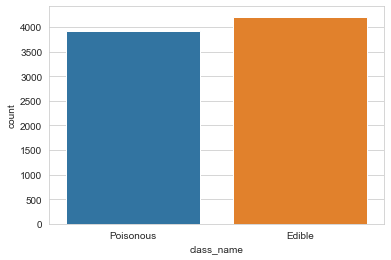

In [78]:
# checking the distribution. here we can see that we have more Edible mushrooms than the Poisonous mushrooms. 
# But there is not a massive bias in the data which is good news and means that model will be pretty accurate

sns.set_style('whitegrid')
sns.countplot(x='class_name',data=mushroom_df)

In [79]:
#checking the column names of the data set
mushroom_df.columns

Index(['class_name', 'cap_shape_name', 'cap_surface_name', 'cap_color_name',
       'bruises_name', 'odor_name', 'gill_attachment_name',
       'gill_spacing_name', 'gill_size_name', 'gill_color_name',
       'stalk_shape_name', 'stalk_root_name', 'stalk_surface_above_ring_name',
       'stalk_surface_below_ring_name', 'stalk_color_above_ring_name',
       'stalk_color_below_ring_name', 'veil_type_name', 'veil_color_name',
       'ring_number_name', 'ring_type_name', 'spore_print_color_name',
       'population_name', 'habitat_name'],
      dtype='object')

In [80]:
# converting into final numerical categorical data for the target column
final_data = pd.get_dummies(mushroom_df,columns=['class_name'],prefix='is',prefix_sep='_',drop_first=True)

In [81]:
final_data.head()

,cap_shape_name,cap_surface_name,cap_color_name,bruises_name,odor_name,gill_attachment_name,gill_spacing_name,gill_size_name,gill_color_name,stalk_shape_name,...,stalk_color_above_ring_name,stalk_color_below_ring_name,veil_type_name,veil_color_name,ring_number_name,ring_type_name,spore_print_color_name,population_name,habitat_name,is_Poisonous
0,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,Enlarging,...,White,White,Partial,White,One,Pendant,Black,Scattered,Urban,1
1,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,Enlarging,...,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses,0
2,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,Enlarging,...,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows,0
3,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,Enlarging,...,White,White,Partial,White,One,Pendant,Black,Scattered,Urban,1
4,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black,Tapering,...,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,0


In [82]:
# converting into final numerical categorical data for all other columns

final_data = pd.get_dummies(final_data,columns=['cap_shape_name'],prefix='cap_shape_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['cap_surface_name'],prefix='cap_surface_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['cap_color_name'],prefix='cap_color_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['bruises_name'],prefix='bruises_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['odor_name'],prefix='odor_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['gill_attachment_name'],prefix='gill_attachment_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['gill_spacing_name'],prefix='gill_spacing_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['gill_size_name'],prefix='gill_size_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['gill_color_name'],prefix='gill_color_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_shape_name'],prefix='stalk_shape_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_root_name'],prefix='stalk_root_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_surface_above_ring_name'],prefix='stalk_surface_above_ring_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_surface_below_ring_name'],prefix='stalk_surface_below_ring_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_color_above_ring_name'],prefix='stalk_color_above_ring_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['stalk_color_below_ring_name'],prefix='stalk_color_below_ring_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['veil_type_name'],prefix='veil_type_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['veil_color_name'],prefix='veil_color_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['ring_number_name'],prefix='ring_number_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['ring_type_name'],prefix='ring_type_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['spore_print_color_name'],prefix='spore_print_color_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['population_name'],prefix='population_name',prefix_sep='_',drop_first=True)
final_data = pd.get_dummies(final_data,columns=['habitat_name'],prefix='habitat_name',prefix_sep='_',drop_first=True)

In [83]:
final_data.head()

,is_Poisonous,cap_shape_name_Conical,cap_shape_name_Convex,cap_shape_name_Flat,cap_shape_name_Knobbed,cap_shape_name_Sunken,cap_surface_name_Grooves,cap_surface_name_Scaly,cap_surface_name_Smooth,cap_color_name_Buff,...,population_name_Numerous,population_name_Scattered,population_name_Several,population_name_Solitary,habitat_name_Meadows,habitat_name_Paths,habitat_name_Urban,habitat_name_Waste,habitat_name_Woods,habitat_name_leaves
0,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# importing model_selection from sklearn to easily split train and test data
from sklearn.model_selection import train_test_split

In [85]:
# X is the data set without the target variable and y is with the target variable
# After that we have split the data in train and test X_train, X_test, y_train, y_test with and without the target variable 

X = final_data.drop('is_Poisonous',axis=1)
y = final_data['is_Poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [87]:
# instatiating the LogisticRegression
logReg = LogisticRegression()

In [88]:
# fitting the LogisticRegression model on the train data set
logReg.fit(X_train,y_train)

C:\Users\skulk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# predicting the LogisticRegression model on the test data set
logReg_Pred = logReg.predict(X_test)

In [90]:
# importing classification_report,confusion_matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
# checking the confusion_matrix
print(confusion_matrix(y_test,logReg_Pred))

[[1274    0]
 [   2 1162]]


In [92]:
# Understanding the confusion_matrix
LogReg_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, logReg_Pred, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(LogReg_confustionMatrix)

        pred:1  pred:0
true:1    1162       2
true:0       0    1274


In [93]:
# checking the classification_report
print(classification_report(y_test,logReg_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



From the above metrics, by using Logistic Regression, I have achieved a 100% prediction accuracy when it comes to predicting edible v/s poisonous mushrooms. From the confusion matrix, we have only 2 instances (i.e. 0.08%) when the prediction has failed. The prediciton has failed when the mushroom was edible but the model predicted it to be poisonous. According to me, that is perfectly all right as it is not putting anybody's life at risk. It would have been a problem if it were the other way round as it would put the consumers' life at risk. Since, 100% accuracy has been obtained, I did not feel the need to use any other advanced ML algorithms.

In [116]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=X_train.columns
CoeffLS1["Coefficients"]=logReg.coef_.flatten()
CoeffLS1.sort_values("Coefficients",ascending=False)

,Variable,Coefficients
79,spore_print_color_name_Green,4.598658
19,odor_name_Creosote,3.796506
21,odor_name_Foul,3.599528
28,gill_size_name_Narrow,3.249450
24,odor_name_Pungent,2.822278
...,...,...
72,ring_type_name_Flaring,-1.761455
44,stalk_root_name_Rooted,-1.801610
27,gill_spacing_name_Crowded,-2.222849
41,stalk_root_name_Club,-2.223849


In [143]:
CoeffLS1['Feature'] = CoeffLS1['Variable'].apply(str)
CoeffLS1['Feature'] = CoeffLS1['Feature'].str.rsplit("_", 1).str[0]
finalFeatures = CoeffLS1.sort_values("Coefficients",ascending=False)

In [146]:
# features which affect whether mushroom is edible or poisonous in decreasing order of impact

finalFeatures['Feature'].unique()

array(['spore_print_color_name', 'odor_name', 'gill_size_name',
       'gill_color_name', 'stalk_surface_above_ring_name',
       'population_name', 'stalk_color_below_ring_name', 'cap_color_name',
       'cap_surface_name', 'stalk_surface_below_ring_name',
       'ring_type_name', 'stalk_color_above_ring_name', 'veil_color_name',
       'habitat_name', 'cap_shape_name', 'gill_attachment_name',
       'ring_number_name', 'bruises_name', 'stalk_root_name',
       'stalk_shape_name', 'gill_spacing_name'], dtype=object)

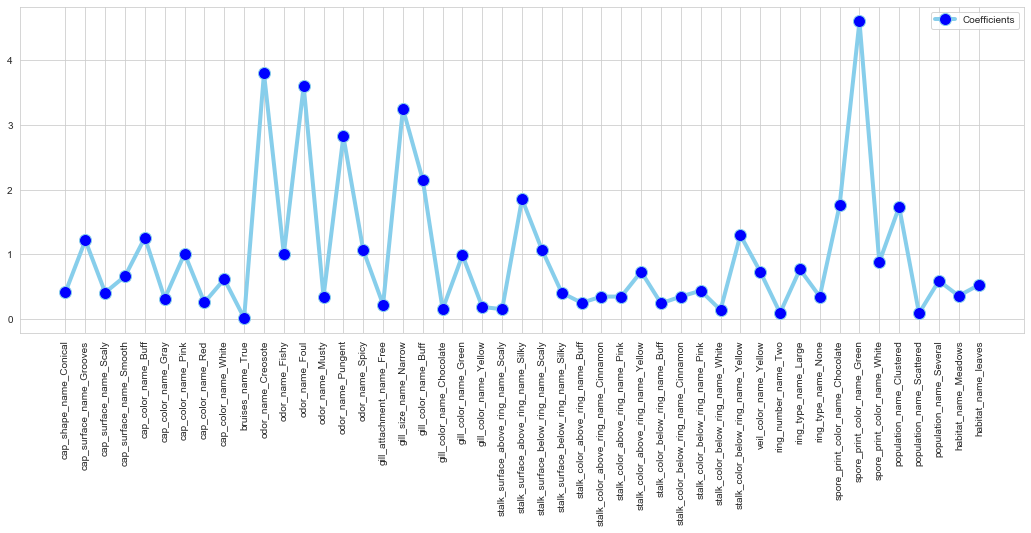

In [127]:
# visually showing the above so it is easy to understand which ML model will work better 
plt.figure(figsize=(18,6))
plt.plot('Variable','Coefficients',markerfacecolor='blue',marker='o', 
         markersize=12, color='skyblue', linewidth=4,data=CoeffLS1[CoeffLS1['Coefficients']>=0])
plt.xticks(rotation=90)
plt.legend()